<a href="https://colab.research.google.com/github/jlin246/Micro-credentials-Jan-2022-BSNS/blob/main/python/Unit%203/Assignments/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [5]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [6]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [7]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [8]:
# Mean of all salaries
print(df['salary'].mean())

113706.45843828715


In [9]:
# Median of all salaries
print(df['salary'].median())

107300.0


# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [10]:
new_df = df[['sex','salary']]
print(new_df)

      sex  salary
0    Male  139750
1    Male  173200
2    Male   79750
3    Male  115000
4    Male  141500
..    ...     ...
392  Male  103106
393  Male  150564
394  Male  101738
395  Male   95329
396  Male   81035

[397 rows x 2 columns]


Finding the Median salary for all males

In [11]:
new_df_male = new_df[new_df.sex == 'Male']
#print(new_df_male)
print(new_df_male.salary.median())

108043.0


Finding the Median salary for all females

In [12]:
new_df_female = new_df[new_df['sex'] == 'Female' ] 
#print(new_df_female)
print(new_df_female['salary'].median())

103750.0


Comparing the Mean salary of Males and Females

In [13]:

difference = new_df_male['salary'].mean() - new_df_female['salary'].mean()
#print(difference)
difference = '{:.2f}'.format(difference)
print(difference)

14088.01


In [14]:
# The difference between mean salaries of male and female
print('The difference between mean salaries of male and female is ' + str(difference))

The difference between mean salaries of male and female is 14088.01


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [15]:
new_df_20moreyears = df[df['yrs.service'] >= 20]
print(new_df_20moreyears)
mean_20moreyears = '{:.2f}'.format(new_df_20moreyears['salary'].mean())
print(mean_20moreyears)

     Unnamed: 0  rank discipline  yrs.since.phd  yrs.service   sex  salary
3             4  Prof          B             45           39  Male  115000
4             5  Prof          B             40           41  Male  141500
6             7  Prof          B             30           23  Male  175000
7             8  Prof          B             45           45  Male  147765
8             9  Prof          B             21           20  Male  119250
..          ...   ...        ...            ...          ...   ...     ...
384         385  Prof          A             27           21  Male  125192
386         387  Prof          A             29           27  Male  139219
388         389  Prof          A             38           36  Male  119450
392         393  Prof          A             33           30  Male  103106
394         395  Prof          A             42           25  Male  101738

[157 rows x 7 columns]
122520.66


Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [16]:
new_df_20lessyears = df[df['yrs.service'] < 20]
#print(new_df_20lessyears)
mean_20lessyears = '{:.2f}'.format(new_df_20lessyears['salary'].mean())
print('Mean salaries of people with less than 20 years experience: ' + str(mean_20lessyears))
print('Mean salaries of people with more than 20 years experience: ' + str(mean_20moreyears))


Mean salaries of people with less than 20 years experience: 107940.50
Mean salaries of people with more than 20 years experience: 122520.66


People who have salary of greater than or equal to 200,000

In [17]:
new_df_200000salary = df[df['salary'] >= 200000]
print(new_df_200000salary)

     Unnamed: 0  rank discipline  yrs.since.phd  yrs.service   sex  salary
43           44  Prof          B             38           38  Male  231545
249         250  Prof          A             29            7  Male  204000
364         365  Prof          A             43           43  Male  205500


Your Findings here...


# Rename values, subset columns, etc

In [18]:
newdf2 = df.copy()
newdf2.rename(columns = {'Unnamed: 0': 'id number' , 'yrs.since.phd': 'phd yrs', 'discipline': 'grades', 'yrs.service' : 'service years', 'sex' : 'gender', 'salary' : 'compensation'})

,id number,rank,grades,phd yrs,service years,gender,compensation
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


# Create some simple visualizations showing some simple statistics

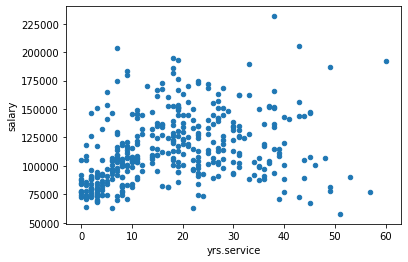

In [27]:
df.plot(kind = 'scatter', x = 'yrs.service', y = 'salary')

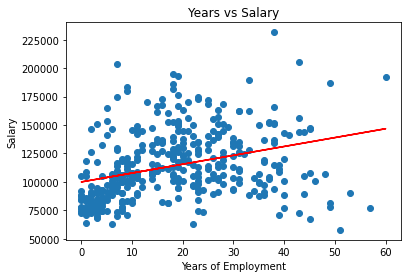

In [19]:
plt.scatter(df['yrs.service'], df['salary'])
m,b = np.polyfit(df['yrs.service'], df['salary'],1)
plt.plot(df['yrs.service'],m*df['yrs.service']+b, color = 'red')
plt.title('Years vs Salary')
plt.xlabel('Years of Employment')
plt.ylabel('Salary')
plt.show()

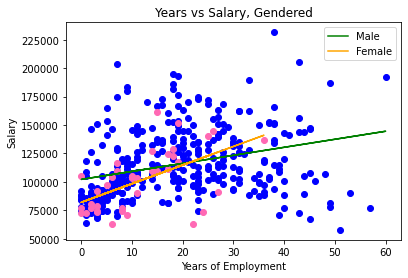

In [20]:
df_male = df[df['sex'] == 'Male']
df_female = df[df['sex'] == 'Female']
plt.scatter(df_male['yrs.service'],df_male.salary,color = 'blue')
plt.scatter(df_female['yrs.service'],df_female.salary, color = 'hotpink')
m1, b1 = np.polyfit(df_male['yrs.service'], df_male.salary, 1)
plt.plot(df_male['yrs.service'], m1* df_male['yrs.service'] + b1, color = 'green')
m2, b2 = np.polyfit(df_female['yrs.service'], df_female.salary, 1)
plt.plot(df_female['yrs.service'], m2*df_female['yrs.service'] + b2, color = 'orange')
plt.title('Years vs Salary, Gendered')
plt.xlabel('Years of Employment')
plt.ylabel('Salary')
plt.legend(['Male',"Female"])

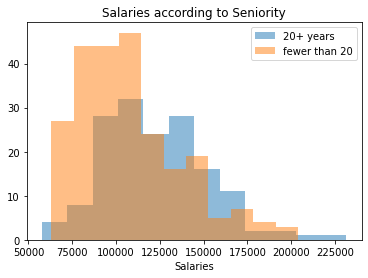

In [21]:
new_df_20moreyears = df[df['yrs.service'] >= 20]
new_df_20lessyears = df[df['yrs.service'] < 20]
plt.hist(new_df_20moreyears['salary'], bins = 'auto', alpha = 0.5)
plt.hist(new_df_20lessyears['salary'], bins = 'auto', alpha = 0.5)
plt.title('Salaries according to Seniority')
plt.xlabel('Salaries')
plt.legend(['20+ years','fewer than 20'])
plt.show()

Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:
1. In the graph "Years v Salary", we can see that, as expected, the more years of service, the higher the salary. The best fit line corroborates that conclusion. 
However, we can also see that there are quite a few outliers-- namely, those in the lower right quadrant of the graph with lower salary but high years of service.
2. In 'Years vs Salary, Gendered", we can see that while men do generally start out their careers with a higher salary than women, the salaries for women increase more quickly as their years of service increase. 
In the best fit lines for both genders, the lines cross around 22 years of service.
3. In 'Salary according to Seniority', the histogram of those who have less than 20 years experience is skewed right, with more data concentrated on the lower end of the salary scale. The histogram of those who have more than 20 years experience is more skewed neutral, and resembles more of a bell curve shape.





